<a href="https://colab.research.google.com/github/ranja-sarkar/DecisionTree/blob/main/Ensemble_models_RF_%26_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
import missingno as msn

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")

# Data

> Some datasets are naturally imbalanced like that of fradulent transactions, churn information etc.
> The data used here is perhaps one such, where the premium tier of customers in a hotel is a minority.

In [68]:
df_train = pd.read_csv('train_data.csv')
df_test = pd.read_csv('test_data.csv')

print(df_train.shape, df_test.shape)

(10000, 16) (2000, 15)


<Axes: >

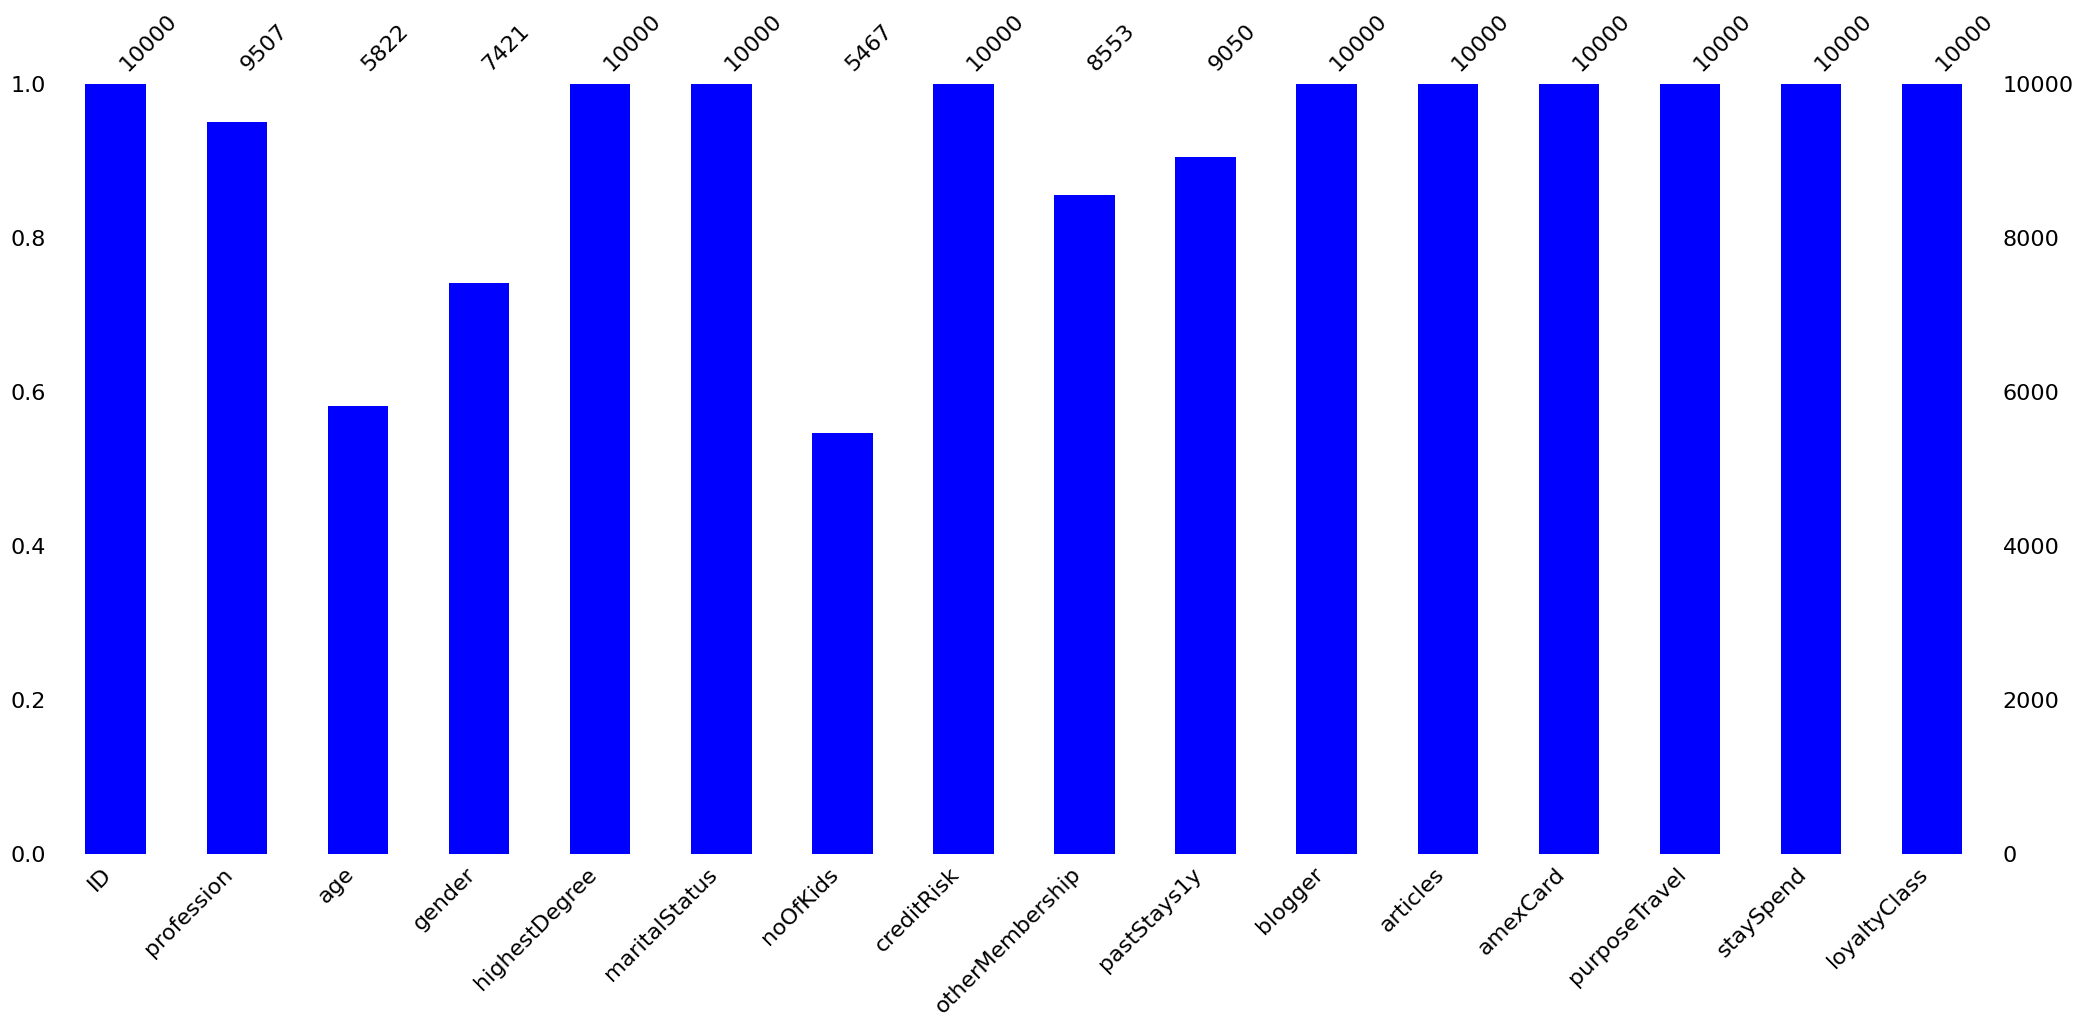

In [69]:
msn.bar(df_train, color = 'blue')

In [52]:
#msn.bar(df_test, color = 'green')

In [70]:
#Label encoding categorical variables

le = LabelEncoder()
df_train['profession'] = le.fit_transform(df_train['profession']).astype('str')
df_test['profession'] = le.fit_transform(df_test['profession']).astype('str')

df_train['gender'] = le.fit_transform(df_train['gender']).astype('str')
df_test['gender'] = le.fit_transform(df_test['gender']).astype('str')

df_train['highestDegree'] = le.fit_transform(df_train['highestDegree']).astype('str')
df_test['highestDegree'] = le.fit_transform(df_test['highestDegree']).astype('str')

df_train['maritalStatus'] = le.fit_transform(df_train['maritalStatus']).astype('str')
df_test['maritalStatus'] = le.fit_transform(df_test['maritalStatus']).astype('str')

df_train['otherMembership'] = le.fit_transform(df_train['otherMembership']).astype('str')
df_test['otherMembership'] = le.fit_transform(df_test['otherMembership']).astype('str')

df_train['blogger'] = le.fit_transform(df_train['blogger']).astype('str')
df_test['blogger'] = le.fit_transform(df_test['blogger']).astype('str')

df_train['amexCard'] = le.fit_transform(df_train['amexCard']).astype('str')
df_test['amexCard'] = le.fit_transform(df_test['amexCard']).astype('str')

df_train['purposeTravel'] = le.fit_transform(df_train['purposeTravel']).astype('str')
df_test['purposeTravel'] = le.fit_transform(df_test['purposeTravel']).astype('str')

df_train['loyaltyClass'] = le.fit_transform(df_train['loyaltyClass']).astype('str')

In [71]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10000 non-null  int64  
 1   profession       10000 non-null  object 
 2   age              5822 non-null   float64
 3   gender           10000 non-null  object 
 4   highestDegree    10000 non-null  object 
 5   maritalStatus    10000 non-null  object 
 6   noOfKids         5467 non-null   float64
 7   creditRisk       10000 non-null  float64
 8   otherMembership  10000 non-null  object 
 9   pastStays1y      9050 non-null   float64
 10  blogger          10000 non-null  object 
 11  articles         10000 non-null  int64  
 12  amexCard         10000 non-null  object 
 13  purposeTravel    10000 non-null  object 
 14  staySpend        10000 non-null  float64
 15  loyaltyClass     10000 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 1.2+ MB


In [72]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2000 non-null   int64  
 1   profession       2000 non-null   object 
 2   age              1138 non-null   float64
 3   gender           2000 non-null   object 
 4   highestDegree    2000 non-null   object 
 5   maritalStatus    2000 non-null   object 
 6   noOfKids         1116 non-null   float64
 7   creditRisk       2000 non-null   float64
 8   otherMembership  2000 non-null   object 
 9   pastStays1y      1805 non-null   float64
 10  blogger          2000 non-null   object 
 11  articles         2000 non-null   int64  
 12  amexCard         2000 non-null   object 
 13  purposeTravel    2000 non-null   object 
 14  staySpend        2000 non-null   float64
dtypes: float64(5), int64(2), object(8)
memory usage: 234.5+ KB


In [73]:
#Replacing missing values

df_train['age'].fillna(df_train['age'].mean(), inplace = True)
df_test['age'].fillna(df_test['age'].mean(), inplace = True)

df_train['noOfKids'].fillna(0, inplace = True)
df_test['noOfKids'].fillna(0, inplace = True)

df_train['pastStays1y'].fillna(0, inplace = True)
df_test['pastStays1y'].fillna(0, inplace = True)

In [ ]:
#print(df_train.columns.to_list())
#sns.pairplot(df_train, hue = 'loyaltyClass',
#             vars = ['age', 'noOfKids', 'creditRisk', 'pastStays1y', 'articles', 'staySpend'],
#             corner = True)

               count         mean          std   min    25%        50%  \
age          10000.0    39.100481     9.469899  18.0  36.00  39.100481   
noOfKids     10000.0     0.455200     0.859574   0.0   0.00   0.000000   
creditRisk   10000.0     2.889681     0.492806   1.0   2.56   2.890000   
pastStays1y  10000.0    22.371000    15.490925   0.0   8.00  22.000000   
articles     10000.0     7.407800     6.816183   0.0   0.00   6.000000   
staySpend    10000.0  1950.964931  5551.342403   0.0   0.00   0.267470   

                    75%          max  
age           42.000000     60.00000  
noOfKids       1.000000      4.00000  
creditRisk     3.230000      4.00000  
pastStays1y   36.000000     49.00000  
articles      13.000000     20.00000  
staySpend    781.467816  75553.55889  


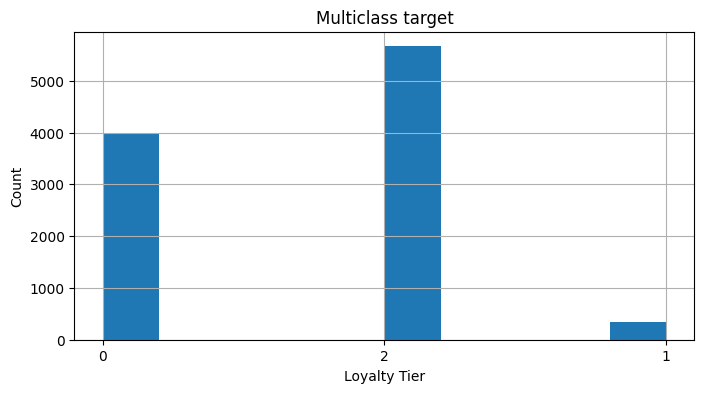

In [74]:
def variables_plot(df, col):

    """
    Function: Describes data and plots target feature distribution
    Arguments: Dataframe, target column

    """

    df_stats = df.drop('ID', axis = 1)

    #df.hist(figsize = (9,7))
    df[col].hist(figsize = (8,4))
    plt.xlabel('Loyalty Tier')
    plt.xticks([0, 1, 2])
    plt.ylabel('Count')
    plt.title('Multiclass target')

    print(df_stats.describe().T)
    return plt.show()


variables_plot(df_train, 'loyaltyClass')

In [75]:
df_train.head(10)

,ID,profession,age,gender,highestDegree,maritalStatus,noOfKids,creditRisk,otherMembership,pastStays1y,blogger,articles,amexCard,purposeTravel,staySpend,loyaltyClass
0,0,2,39.100481,1,3,2,0.0,3.18,3,23.0,0,7,1,2,1433.147527,0
1,1,1,39.100481,2,0,1,1.0,2.07,3,48.0,0,4,1,1,38.379023,2
2,2,0,44.000000,0,5,1,0.0,2.81,0,32.0,0,1,0,1,0.000000,0
3,3,2,39.100481,1,1,2,0.0,3.46,3,6.0,0,16,1,2,0.000000,0
4,4,0,39.100481,0,1,3,0.0,3.21,5,0.0,1,0,0,0,764.418767,2
5,5,1,27.000000,2,6,2,0.0,3.11,0,22.0,1,0,1,0,0.000000,2
6,6,1,39.100481,2,1,2,0.0,2.07,4,0.0,0,18,0,1,0.000000,2
7,7,4,39.100481,2,3,3,0.0,3.22,3,15.0,1,0,0,0,1229.580788,0
8,8,1,47.000000,0,6,1,1.0,2.90,5,22.0,0,8,1,0,0.000000,2
9,9,1,19.000000,2,3,1,0.0,3.38,6,46.0,0,15,1,0,0.000000,0


**Data Scaling**

> **TRAIN set**

In [76]:
dff_train = df_train.drop('ID', axis = 1)
df_column_names = list(dff_train.columns)
df_column_names.remove('loyaltyClass')

x = dff_train.loc[:, dff_train.columns != 'loyaltyClass'].values  #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(data = x_scaled, columns = df_column_names)

> **TEST set**

In [77]:
dff_test = df_test.drop('ID', axis = 1)
dff_column_names = list(dff_test.columns)

xt = dff_test.loc[:,].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(xt)
dff_normalized = pd.DataFrame(data = x_scaled, columns = dff_column_names)

In [78]:
df_normalized_target = pd.concat([df_normalized, dff_train['loyaltyClass']], axis = 1)

#separating independent and dependent (target) variables
X = df_normalized_target[list(df_normalized_target.columns)[0:14]]

Y = df_normalized_target[list(df_normalized_target.columns)[-1]]

In [79]:
print(X.shape, Y.shape)

(10000, 14) (10000,)


**Data splitting into train and validation subsets**

In [80]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 42)

# [Random Forest] Model training

In [83]:
rfc1 = RandomForestClassifier(n_estimators = 100, random_state = 42)
rfc1.fit(x_train, y_train)

print(rfc1.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [84]:
rfc_pred1 = rfc1.predict(x_test)
cm = confusion_matrix(y_test, rfc_pred1)

print ("Accuracy=", round(metrics.accuracy_score(y_test, rfc_pred1), 2))
print('Confusion matrix:')
print(cm)
print('Classification Report:')
print(classification_report(y_test, rfc_pred1))


#disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rfc1.classes_)
#disp.plot()

Accuracy= 0.61
Confusion matrix:
[[ 425    0  561]
 [  30    0   61]
 [ 320    0 1103]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.43      0.48       986
           1       0.00      0.00      0.00        91
           2       0.64      0.78      0.70      1423

    accuracy                           0.61      2500
   macro avg       0.40      0.40      0.39      2500
weighted avg       0.58      0.61      0.59      2500



[[ 425    0  561]
 [  30    0   61]
 [ 320    0 1103]]
[[0.43103448 0.         0.56896552]
 [0.32967033 0.         0.67032967]
 [0.22487702 0.         0.77512298]]


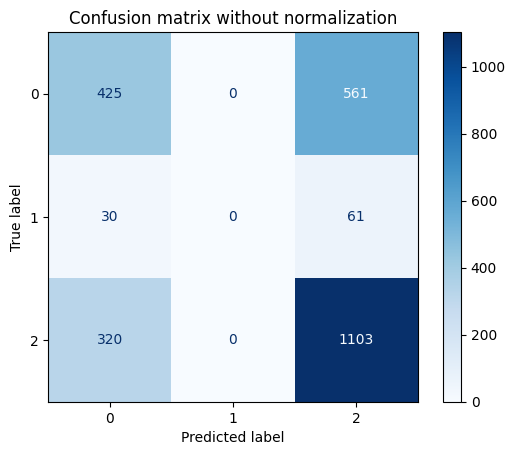

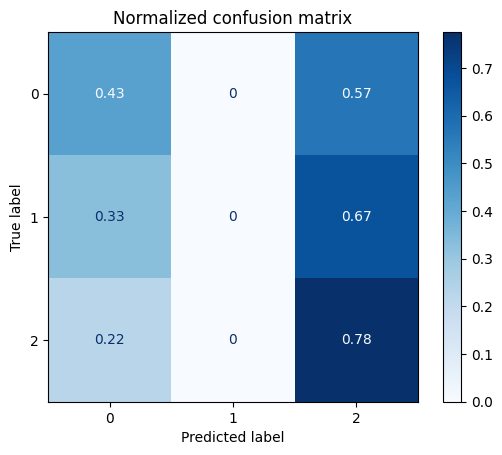

In [85]:
def normalized_confusion_mat(model_obj, class_names, y):
    """
    Function: Displays normalized and non-normalized confusion matrices
    Arguments: Trained Model, class names' object, target test dataframe

    """

    titles_options = [
        ("Confusion matrix without normalization", None),
        ("Normalized confusion matrix", "true"),]
    for title, normalize in titles_options:

        disp = ConfusionMatrixDisplay.from_estimator(
            model_obj,
            x_test,
            y,
            display_labels = class_names,
            cmap = plt.cm.Blues,
            normalize = normalize,
        )
        disp.ax_.set_title(title)
        print(disp.confusion_matrix)

normalized_confusion_mat(rfc1, rfc1.classes_, y_test)

**The confusion matrix with and without normalization by class support size (#elements in each class) in case of class imbalance helps to have a visual interpretation of which class is being misclassified.**

For more on confusion matrix, please visit:
https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

**Predictions**

              count         mean          std    min    25%        50%  \
age          2000.0    38.783831     9.234016  18.00  36.00  38.783831   
noOfKids     2000.0     0.463500     0.844408   0.00   0.00   0.000000   
creditRisk   2000.0     2.882825     0.497648   1.12   2.55   2.890000   
pastStays1y  2000.0    21.684000    15.325912   0.00   8.00  21.000000   
articles     2000.0     7.664500     6.921553   0.00   0.00   7.000000   
staySpend    2000.0  1874.478352  5616.555419   0.00   0.00   0.152998   

                    75%          max  
age           41.250000     60.00000  
noOfKids       1.000000      4.00000  
creditRisk     3.220000      4.00000  
pastStays1y   35.000000     49.00000  
articles      14.000000     20.00000  
staySpend    852.937309  58905.79461  


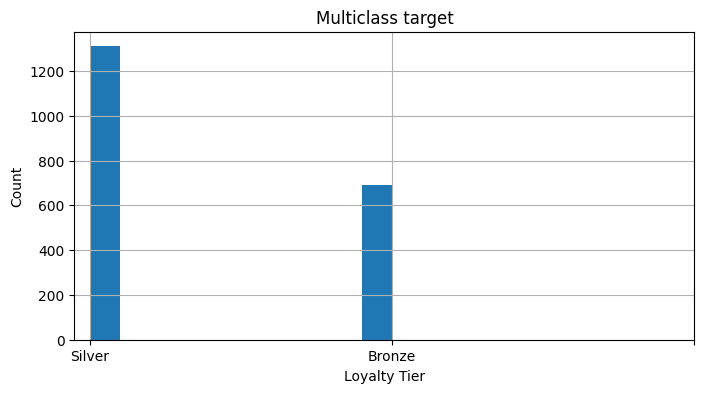

In [86]:
XT = dff_normalized[list(dff_normalized.columns)[0:15]]

pred1 = rfc1.predict(XT)

results1 = pd.DataFrame(pred1, columns = ['Predicted loyaltyClass'])
dfc1 = pd.concat([df_test, results1], axis = 1)

dfc1.loc[(dfc1['Predicted loyaltyClass'] == '0'), 'loyaltyTier'] = 'Bronze'
dfc1.loc[(dfc1['Predicted loyaltyClass'] == '1'), 'loyaltyTier'] = 'Gold'
dfc1.loc[(dfc1['Predicted loyaltyClass'] == '2'), 'loyaltyTier'] = 'Silver'

variables_plot(dfc1, 'loyaltyTier')

**Feature Importance**

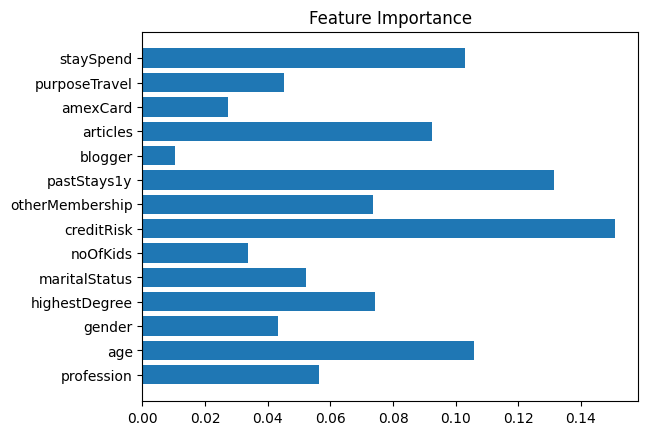

In [87]:
plt.barh(dff_normalized.columns, rfc1.feature_importances_)
plt.title ('Feature Importance')
plt.show()

In [22]:
#import shap

#def features(model_obj, x):
#    """
#    Function: Displays SHAP values of features in the dataset
#    Arguments: Trained model, feature test dataframe

#    """

#    explainer = shap.TreeExplainer(model_obj)
#    shap_vals = explainer.shap_values(x)

#    return shap.summary_plot(shap_vals, x, plot_size = (9, 7))

#features(rfc1, XT)

> SHAP (SHapley Additive ExPlanations) is an approach taken from Game Theory to explain the impact of features on the output of an ML model. While model-agnostic statistical tests are performed to select input features for predictive modeling, posthoc methods like SHAP have proved to be beneficial in model interpretability. Selection of a particular approach entirely depends on the nature (complexity, dimensionality) of the problem we are solving, and on the hypothesis set by the business.
>
> https://en.wikipedia.org/wiki/Game_theory
>
> https://github.com/benedekrozemberczki/shapley
>
> https://github.com/shap/shap
>
>
> Feature importance refers to a class of techniques utilized to assign scores to (input) variables/features that indicate relative importances of each in a predictive model.

> It is good to know:-

>> 1. Shapley values assume an additive contribution of the features to the prediction. And that's not always the case and certainly not all ML models model additive interactions between features.

>> 2. The explanations obtained from SHAP do not always coincide with those derived from intrinsically explainable models. This leads to asking whether Shapley value explanations are true to the model or true to the data.

>> 3. Shapley values are computationally expensive if not impossible to compute, so we use cost effective approximations instead. These approximations often have an element of randomness, which means that the solution is not unique any more, which was one of the key points of using SHAP to begin with.

# [XGBoost] Model Training

In [89]:
y1_train = pd.to_numeric(y_train)
xgb_model = xgb.XGBClassifier(objective = "multi:softprob", n_estimators = 100, eval_metric = "logloss", random_state = 42)

xgb_model.fit(x_train, y1_train, verbose = True)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [90]:
print(xgb_model.get_params())

{'objective': 'multi:softprob', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [91]:
y1_test = pd.to_numeric(y_test)
y_pred = xgb_model.predict(x_test)
cm_pred = confusion_matrix(y1_test, y_pred)

print ("Accuracy=", round(metrics.accuracy_score(y1_test, y_pred), 2))
print(cm_pred)

Accuracy= 0.61
[[ 459    1  526]
 [  42    0   49]
 [ 365    3 1055]]


[[ 459    1  526]
 [  42    0   49]
 [ 365    3 1055]]
[[0.46551724 0.0010142  0.53346856]
 [0.46153846 0.         0.53846154]
 [0.25650035 0.00210822 0.74139143]]


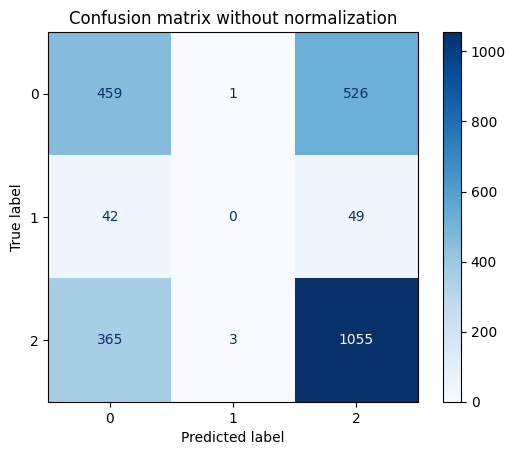

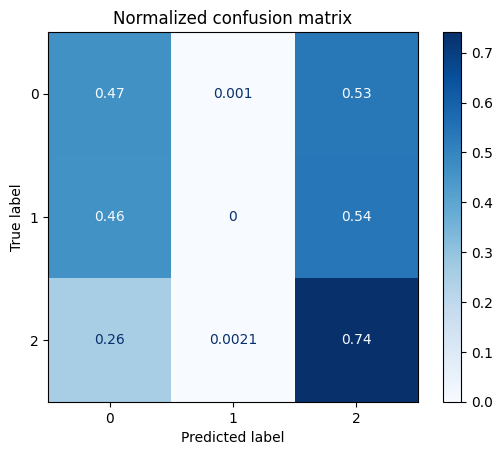

In [92]:
normalized_confusion_mat(xgb_model, xgb_model.classes_, y1_test)

                         count         mean          std    min    25%  \
age                     2000.0    38.783831     9.234016  18.00  36.00   
noOfKids                2000.0     0.463500     0.844408   0.00   0.00   
creditRisk              2000.0     2.882825     0.497648   1.12   2.55   
pastStays1y             2000.0    21.684000    15.325912   0.00   8.00   
articles                2000.0     7.664500     6.921553   0.00   0.00   
staySpend               2000.0  1874.478352  5616.555419   0.00   0.00   
Predicted loyaltyClass  2000.0     1.263000     0.964519   0.00   0.00   

                              50%         75%          max  
age                     38.783831   41.250000     60.00000  
noOfKids                 0.000000    1.000000      4.00000  
creditRisk               2.890000    3.220000      4.00000  
pastStays1y             21.000000   35.000000     49.00000  
articles                 7.000000   14.000000     20.00000  
staySpend                0.152998  852.93

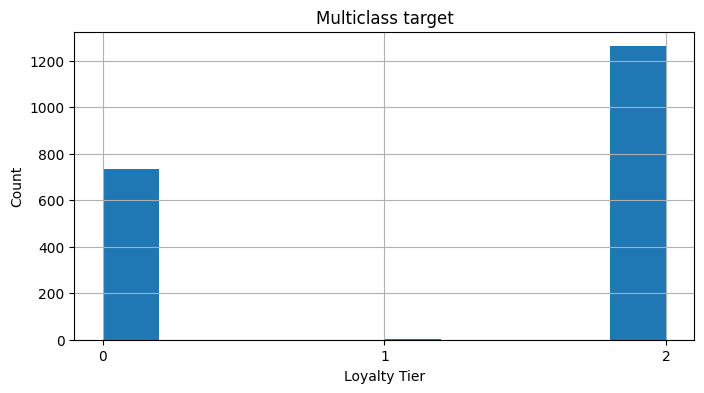

In [93]:
predictions = xgb_model.predict(XT)

result_df = pd.DataFrame(predictions, columns = ['Predicted loyaltyClass'])
dfr = pd.concat([df_test, result_df], axis = 1)

variables_plot(dfr, 'Predicted loyaltyClass')

>> 0 => Bronze

>> 1 => Gold

>> 2 => Silver

**Feature Importance**

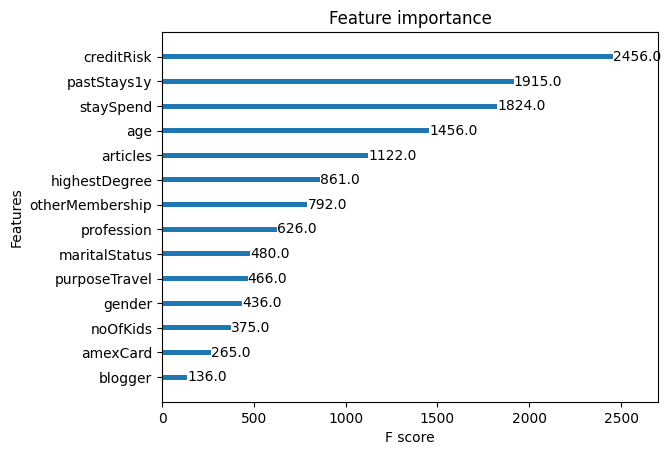

In [94]:
#xgb.plot_tree(xgb_model, num_trees = 5)
#xgb.to_graphviz(xgb_model, num_trees = 5)

xgb.plot_importance(xgb_model)
plt.grid(False)

In [30]:
#features(xgb_model, XT)

>> XGBoost  and RF (random forest) yield the same 61% accuracy for the given dataset, and same number of estimators.

>> What differs between the models is the number of false postive and false negative outcomes.

> The tree splitting criteria are Gini index and entropy, and are measures of impurity or disorder in a dataset. The goal of a decision tree is to minimize impurity or maximize information gain at each split.


>> Gini index tends to be less sensitive to class imbalance, as it works to minimize the misclassification error. This index favors larger partitions with distinct classes, making it more suitable for handling multi-class problems.

>> Entropy quantifies the amount of uncertainty or randomness present in the data. The entropy measure tends to favor smaller partitions with pure classes. Entropy is sensitive to class imbalance, as it works by minimizing the log loss.

>> The Gini Index and Entropy in practice, often produce similar results. However, there might be slight differences in the data splits generated by each measure based on an attribute or feature. The choice between the two depends on the specific problem at hand and the desired outcome.



:> The predictions of a model change when the *probability threshold or decision threshold* changes. By default, the threshold is set to 0.5 in sklearn.
Here's how to tune the threshold: https://scikit-learn.org/1.5/modules/classification_threshold.html


> For a fair model, the right balance of 'wrong rejections' and 'wrong acceptances' that is, False Negative rate and False Positive rate is attained.
For more on this concept, please refer to the article:
https://mlu-explain.github.io/equality-of-odds/


> Now, a **random forest** model can be trained with the **XGBoost** API.

>> Reference: https://xgboost.readthedocs.io/en/stable/tutorials/rf.html
  